# Task 5

Analyze traffic accident data to identify patterns related to road conditions, weather and time of day. Visualize accident hotspots and contributing factors. 

# Loading Data and Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv("C:\\Users\\nibin\\Downloads\\RTA Dataset.csv\\RTA Dataset.csv")

# Data Inspection 

In [80]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [81]:
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [82]:
data.shape

(12316, 32)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [84]:
# Checking the duplicate values
data.duplicated().sum()

0

In [85]:
# Checking the null values
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [86]:
# Making a clone of the original data
df = data.copy()

In [87]:
df.head(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury


# Data Preprocessing

In [88]:
# Filling the null values
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0], inplace=True)
df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0], inplace=True)
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0], inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0], inplace=True)

In [89]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [121]:
# Statistical description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [91]:
# Value counts of accident severity
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [115]:
# Value counts of driver's age
df['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [116]:
# Value counts of weather conditions
df['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [119]:
# Value counts of types of collision 
df['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

# EDA and Data Visualization

In [128]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

Hour Frequency:
0     0.016726
1     0.010880
2     0.006820
3     0.006820
4     0.007389
5     0.006171
6     0.017376
7     0.043196
8     0.067230
9     0.045388
10    0.040598
11    0.048961
12    0.056106
13    0.062683
14    0.051884
15    0.070965
16    0.074781
17    0.099708
18    0.077623
19    0.057486
20    0.049042
21    0.032559
22    0.032640
23    0.016970
Name: Time, dtype: float64


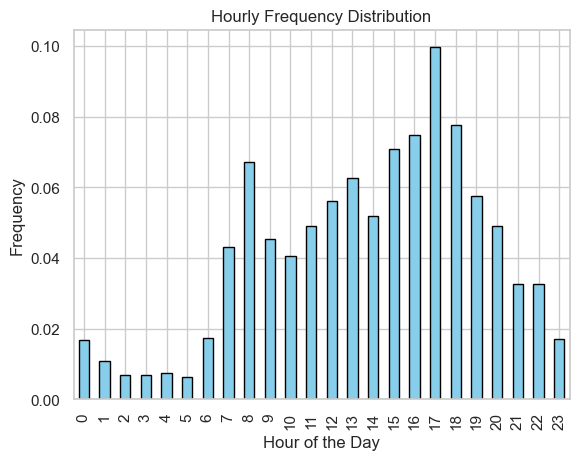

In [138]:
# Distribution of Time 
hour_frequency = df['Time'].dt.hour.value_counts().sort_index()
hour_frequency=hour_frequency/sum(hour_frequency)
print("Hour Frequency:")
print(hour_frequency)
hour_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hourly Frequency Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

There is probably a slight increase in frequency during the mid-day and evening time frame.

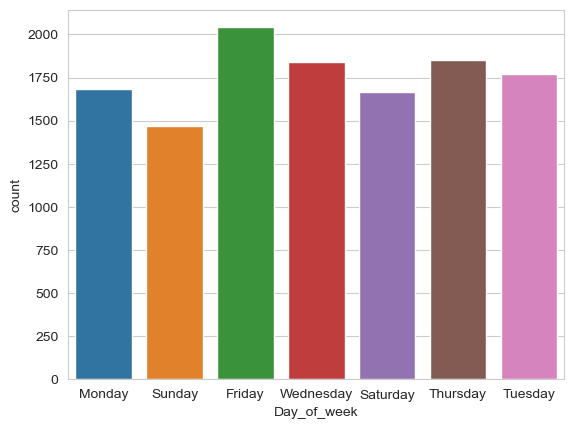

In [124]:
# Count distribution of Days 
sns.countplot(x="Day_of_week",data=df) 
plt.xticks(rotation='horizontal')
plt.show()

The frequency is almost similar during the week.

In [139]:
# Percentage distribution of driver's age
b=df.loc[df['Age_band_of_driver'] !="Unknown", ['Age_band_of_driver', 'Accident_severity']]
b=((b.groupby(['Age_band_of_driver']).size()/df["Age_band_of_driver"].count())*100)
b

Age_band_of_driver
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Under 18     6.698603
dtype: float64

<Axes: title={'center': 'Percentages of accidents by age band'}>

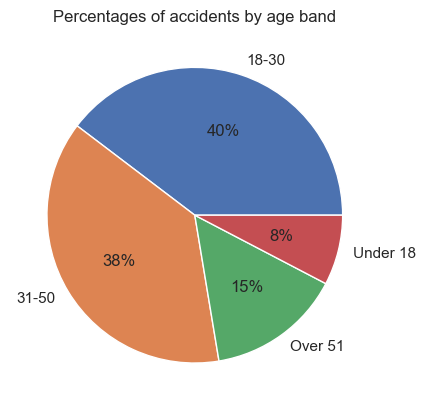

In [140]:
# Pie chart dsitribution of age groups
b.plot.pie(autopct='%1.0f%%', title='Percentages of accidents by age band')

The youth age group is dominant in numbers followed by middle age group

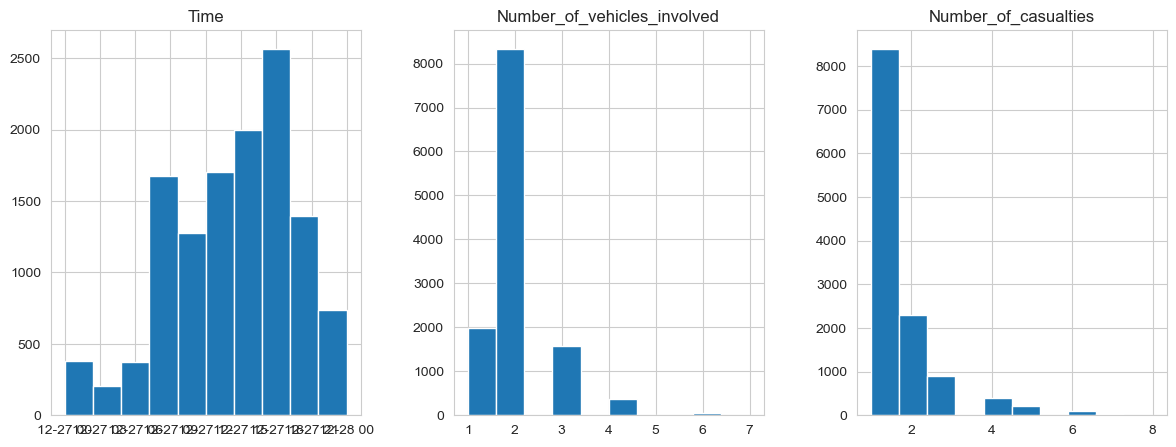

In [92]:
# Histogram distribution of numerical features
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [93]:
# Value counts of casualties
df['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

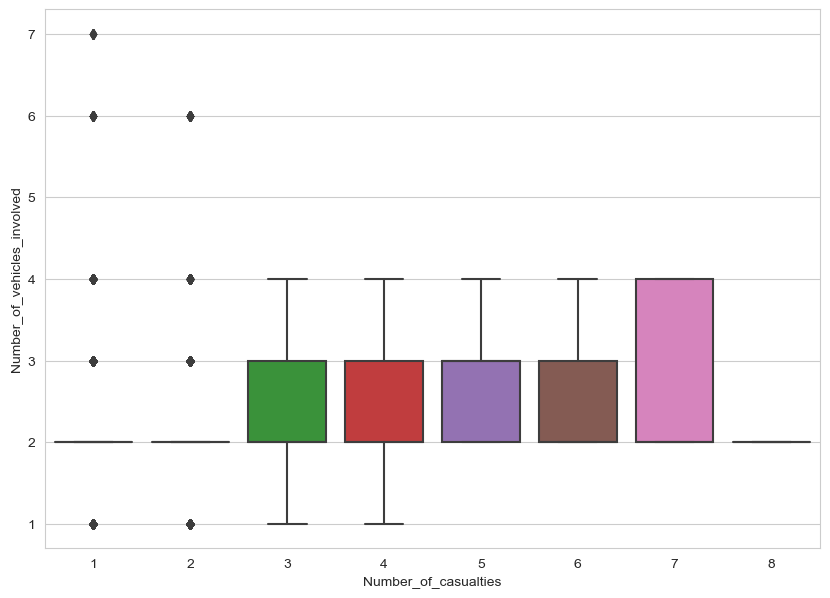

In [94]:
# Box plot distribution
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

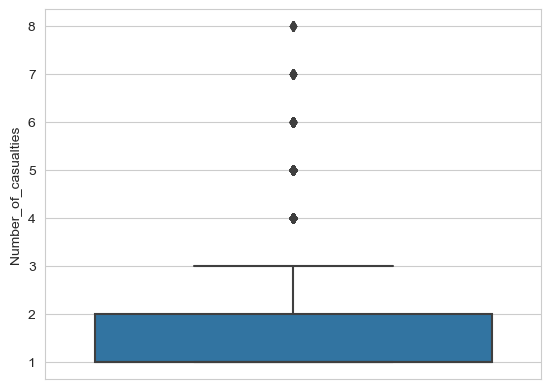

In [95]:
# Box plot distribution of casualties
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

In [96]:
# Value counts of vehicles involved in accidents 
df['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

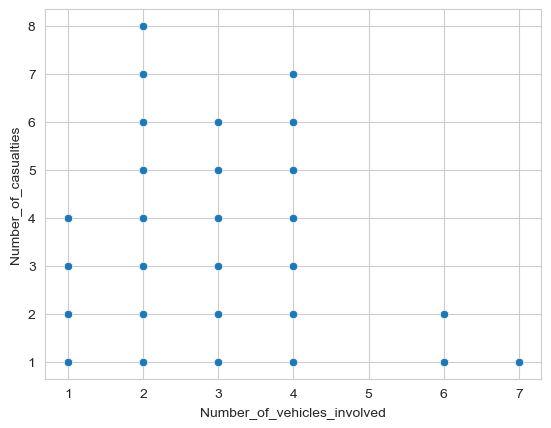

In [97]:
# Scatter plot relation
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

There is no visible correlation between Number_of_casualties and Number_of_vehicles_involved columns

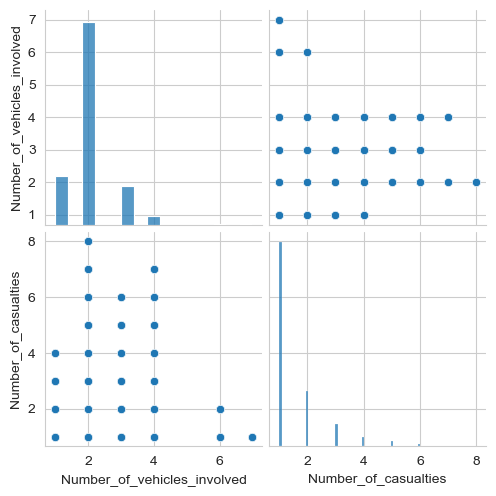

In [98]:
# Pair plot distribution
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

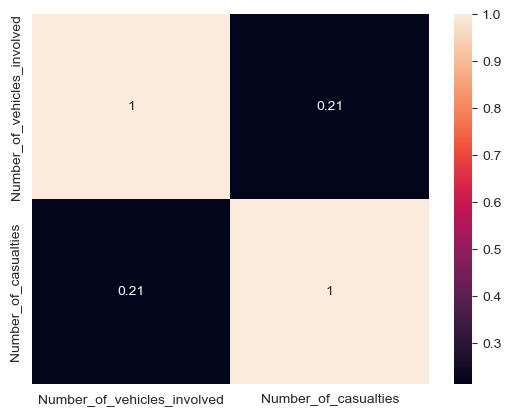

In [99]:
# Correlation description 
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

These are not much extremely correlated variables

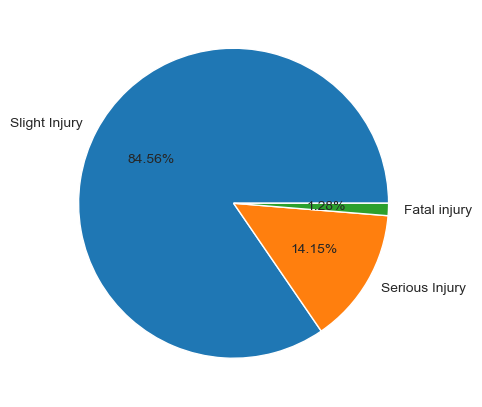

In [100]:
# Pie chart distribution of accident severity
plt.figure(figsize=(5,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

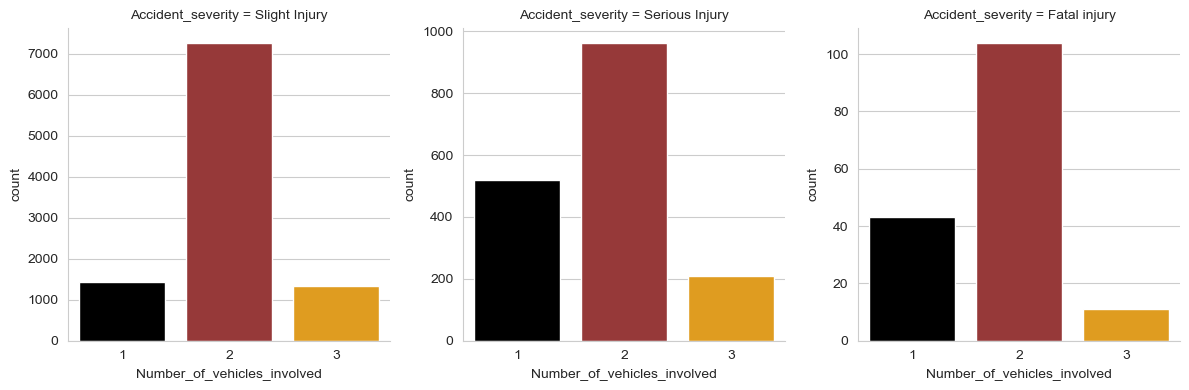

In [101]:
# creating agrid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


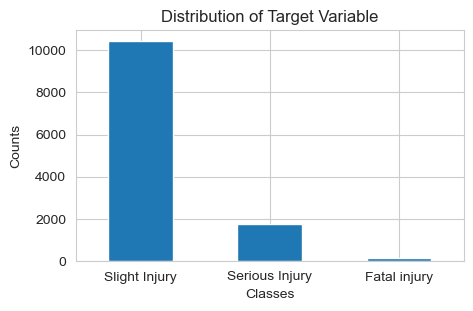

In [102]:
# Accident severity count distribution
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Create a bar plot
plt.figure(figsize=(5, 3))
target_count.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation='horizontal')
plt.show()


In [103]:
# Percentage calculation of Gender of the driver
((df.groupby(['Sex_of_driver']).size() / df["Sex_of_driver"].count()) * 100).add_prefix('Accidents Caused by ')

Sex_of_driver
Accidents Caused by Female      5.691783
Accidents Caused by Male       92.862943
Accidents Caused by Unknown     1.445274
dtype: float64

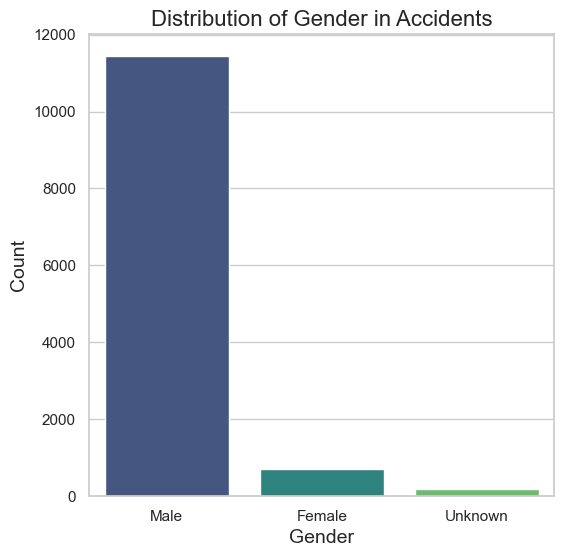

In [130]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Distribution of Gender using a bar chart
plt.figure(figsize=(6,6))
sns.countplot(x='Sex_of_driver', data=df, palette='viridis')
plt.title('Distribution of Gender in Accidents', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

The number of male driver is in large amount while female is negligible

Text(0.5, 0, 'Causes')

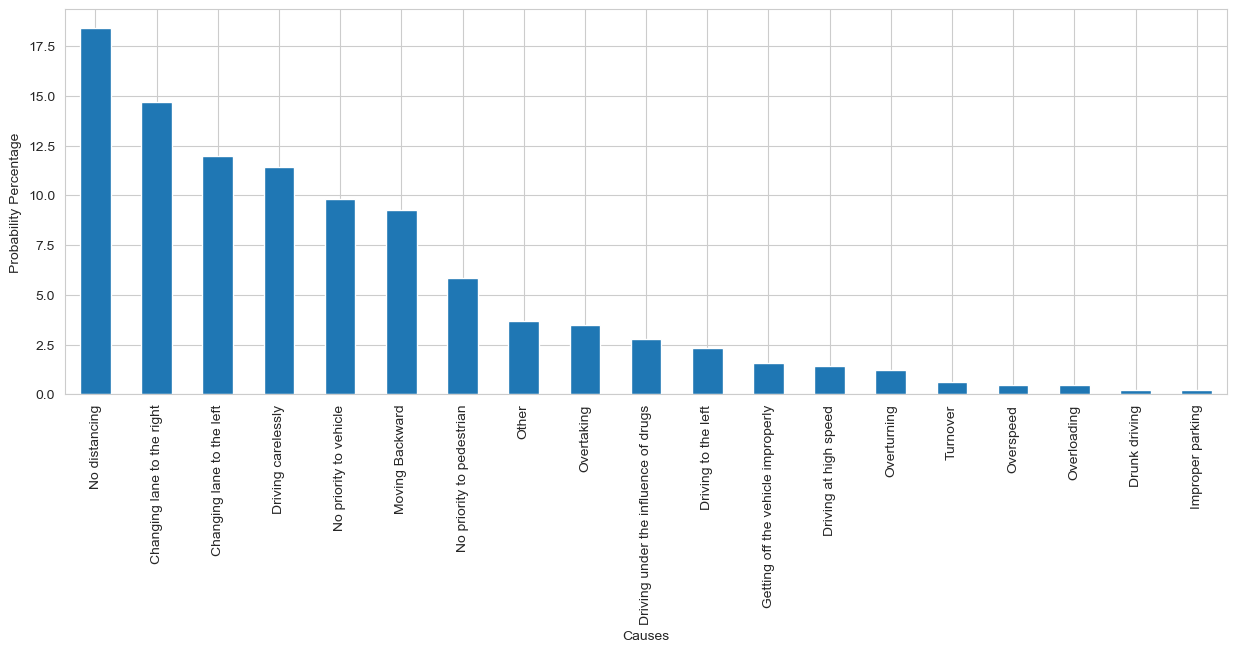

In [104]:
# Distribution of causes of the accidents
plt.figure(figsize =(15,5))
a= df.loc[df['Cause_of_accident'] !="Unknown"]
bar_plot=((a.groupby('Cause_of_accident')['Cause_of_accident'].count().sort_values(ascending=False)/a['Cause_of_accident'].count())*100).plot.bar()
bar_plot.set_ylabel("Probability Percentage")
bar_plot.set_xlabel("Causes")

Graphical Representation to Probability of Top 4 Cause to Happen

Text(0.5, 0, 'Causes')

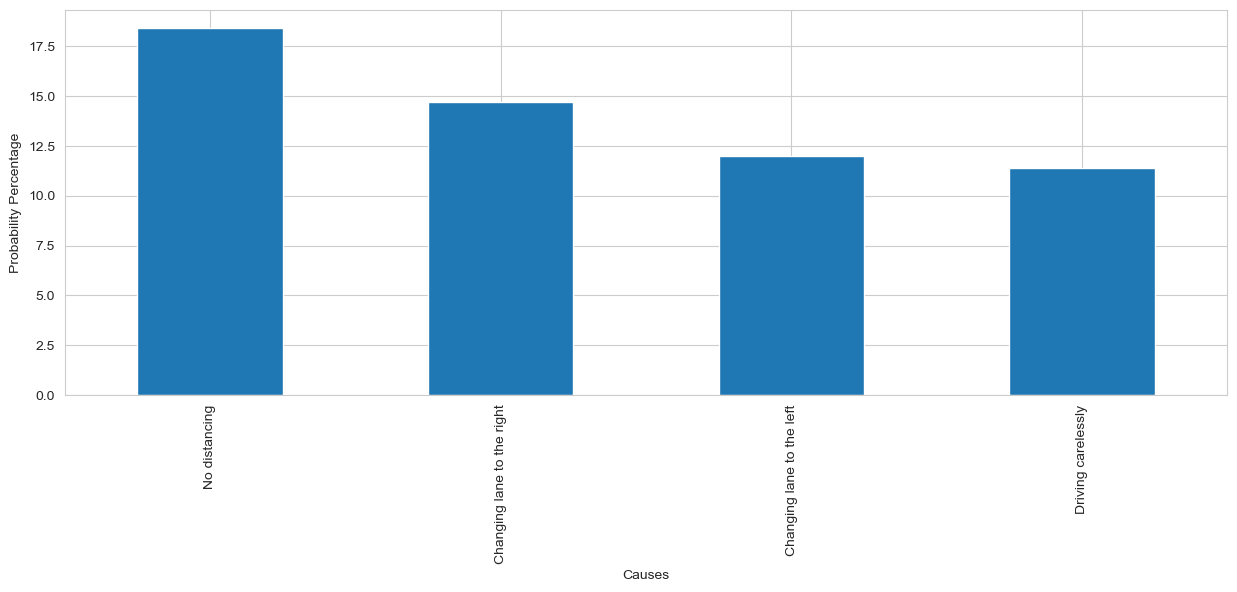

In [105]:
# Top 4 causes by probability percentage
plt.figure(figsize =(15,5))
a= df.loc[df['Cause_of_accident'] !="Unknown"]
bar_plot=((a.groupby('Cause_of_accident')['Cause_of_accident'].count().sort_values(ascending=False)/a['Cause_of_accident'].count())*100).head(4).plot.bar()
bar_plot.set_ylabel("Probability Percentage")
bar_plot.set_xlabel("Causes")

No distancing and changing lane are the frequent factors while driving at High Speed is not one of the main factors that Causes Fatal Severity Accidents

Despite the fact that speeding causes accidents. After analysis it’s found that speeding is not one of the main factors.

In [107]:
# Storing categorical features into a variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [108]:
# Storing numerical features into a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties']


ValueError: num must be an integer with 1 <= num <= 28, not 29

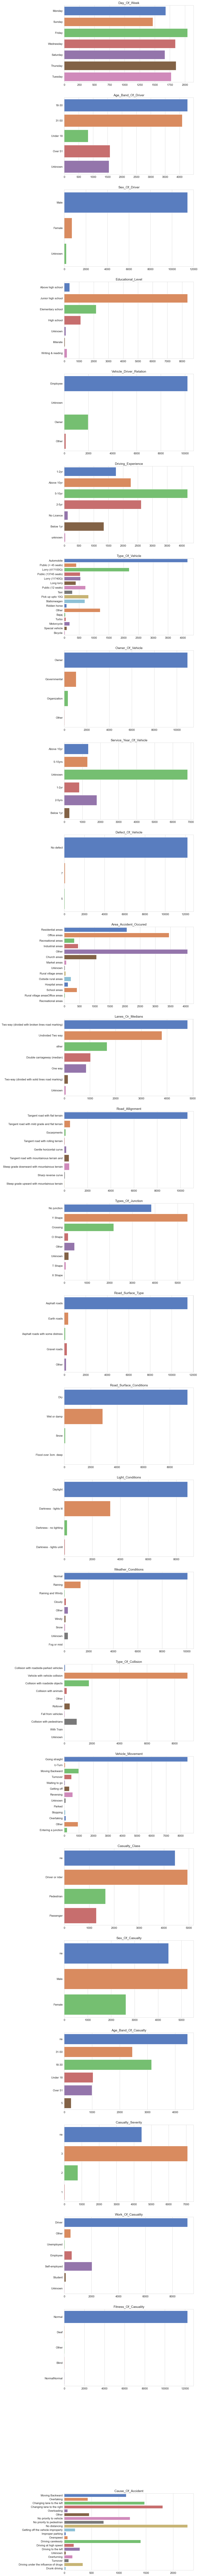

In [112]:
# Count plot for categorical features
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

In [106]:
# Overview of the data
ff = pd.crosstab(index=df['Cause_of_accident'], columns=df['Accident_severity'], margins=True)
pd.crosstab(index=df['Cause_of_accident'], columns=df['Accident_severity'], margins=True)

print("P(Cause = Speed | Severity = Fatal) = " + str(((ff.iloc[2,2]+ff.iloc[15,2])/(df.where(df["Accident_severity"] == 2)['Accident_severity'].count()))))
ff

P(Cause = Speed | Severity = Fatal) = inf


Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Cause_of_accident,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


# Conclusion

Despite the fact that speeding causes accidents. After analysis it’s found that speeding is not one of the main factors. Both genders cause on average the same severity of accidents.

Drunk driving and overturning are the major causes of high severity accidents. People with no education cause accidents with higher mean severity.

The highest percentage of acciednts is caused by age groups from 18-31 and 31-50. Younger Drivers Are Expected To Commit More Accidents And Crashes Compared To Older Drivers. Furthermore, there is no relation between old age and Accidents.

Daylight acciednts have the highest mean severity. Having less driving experience will result in more severe accidents. It is recommended to provide more training for inexperienced drivers.
